In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#import importlib
#import Df2inp
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

#Df2inp = importlib.reload(Df2inp)   # reload it
#prepro_data = Df2inp.prepro_data

#/content/drive/My Drive/Universidad/2020-1/Mineria de datos/Proyectov2/tse_db/train.csv

In [3]:
path = '/content/drive/My Drive/Universidad/2020-1/Mineria de datos'
path = path + '/Proyectov2/tse_db/train.csv'
# path = '/home/jueguevaramo/Documents/Models/Data_bases/'
# path = path + "tweet-sentiment-extraction/train.csv"
data = pd.read_csv(path)

data['text'] = data['text'].astype('str')
data['selected_text'] = data['selected_text'].astype('str')
data["sentiment"] = data["sentiment"].astype("str")

data["text_sent"] = data["text"]  # + " " +data["sentiment"]

# data_ = prepro_data(tweet=data.text,
#                     sentiment=data.sentiment,
#                     selected_text=data.selected_text)

#tok = data_.Dt2in(vocab_size=10000,
#                 char_level=True,
#                 max_length=141,
#                 shuffle=True)     
# tok.index_word               
dic_ner_classes = {'0.0':0, 'B-':1, 'I-':2, 'E-':3}

In [4]:
k = 142
print(data["text"].iloc[k])
print(data["selected_text"].iloc[k])


Unfortunatley, AerLingus no longer fly to Copenhagen so we`re have to fly Ryanair to Billund and drive up to Copenhagen one of the days!
Unfortunatley,


In [5]:
print(data["text"].iloc[k].split())
print(data["selected_text"].iloc[k].split())

['Unfortunatley,', 'AerLingus', 'no', 'longer', 'fly', 'to', 'Copenhagen', 'so', 'we`re', 'have', 'to', 'fly', 'Ryanair', 'to', 'Billund', 'and', 'drive', 'up', 'to', 'Copenhagen', 'one', 'of', 'the', 'days!']
['Unfortunatley,']


In [6]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [7]:
c = 15
print("Predicción:", data["text"].iloc[k][:c])
print("Real:", data["selected_text"].iloc[k])
print(jaccard(data["text"].iloc[k][:c], data["selected_text"].iloc[k]))

Predicción: Unfortunatley, 
Real: Unfortunatley,
1.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data["text_sent"],
                                                    data[["selected_text","sentiment"]],
                                                    test_size=0.3,
                                                    shuffle=True)

In [9]:
train_sentiment = pd.get_dummies(y_train["sentiment"])
test_sentiment = pd.get_dummies(y_test["sentiment"])
y_train = y_train["selected_text"]
y_test = y_test["selected_text"]

In [10]:
X_train.iloc[k], y_train.iloc[k], train_sentiment.iloc[k]

('Reading through today`s paper along with some watered down coffee compliments of my `rents...',
 'Reading through today`s paper along with some watered down coffee compliments of my `rents...',
 negative    0
 neutral     1
 positive    0
 Name: 23994, dtype: uint8)

In [11]:
filter1_p = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
filter2_p = '"#$%&()+,-/:;<=>@[\\]^_`{|}~\t\n'
filter3 = '~\t\n'
tokenizer1 = Tokenizer(filters=filter3,
                       oov_token="<OOD>",
                       lower=True)

tokenizer1.fit_on_texts(X_train)
seq1 = tokenizer1.texts_to_sequences(X_train)
subseq1 = tokenizer1.texts_to_sequences(y_train)


seq2 = tokenizer1.texts_to_sequences(X_test)
subseq2 = tokenizer1.texts_to_sequences(y_test)

def find_sub_list(sl, l):
    sll = len(sl)
    for ind in (i for i, e in enumerate(l) if e == sl[0]):
        if l[ind:ind+sll] == sl:
            return (ind, ind+sll-1)
    return('')



In [12]:
print(seq1[k])
print(subseq1[k])

[652, 387, 2552, 1265, 939, 22, 60, 6549, 193, 398, 6550, 13, 6, 10527]
[652, 387, 2552, 1265, 939, 22, 60, 6549, 193, 398, 6550, 13, 6, 10527]


In [13]:
find_sub_list(subseq1[k], seq1[k])

(0, 13)

In [14]:
##  Intentar con reversa
mask = np.zeros((len(seq1), 36))
indx_id = np.zeros((len(seq1), 36))
token_class = np.zeros((len(seq1), 36))
begin_token = np.zeros((len(seq1), 36))
end_token = np.zeros((len(seq1), 36))

count = 0

for kk in range(len(seq1)):
    
    str1 = subseq1[kk]
    str2 = seq1[kk]
    bool_ = np.isin(str1, str2)
    
    indices = "NA"
    
    indx_id[kk,:len(str2)] = str2

    for ii in range(len(str1)):
        a = find_sub_list(str1[ii:], str2)
        if a != "":
            indices = a 
            break
    
    if indices == "NA":
        count = count + 1
    
    else:
        mask[kk,indices[0] : indices[1] + 1 ] = 1

        if sum(mask[kk]) == 1:
            
            token_class[kk, indices[0]] = 1 
            
            begin_token[kk, indices[0]] = 1
            end_token[kk, indices[0]] = 1
        
        elif sum(mask[kk]) == 2:
            
            token_class[kk, indices[0]] = 1
            token_class[kk, indices[1]] = 3 

            begin_token[kk, indices[0]] = 1
            end_token[kk, indices[1]] = 1
        
        elif sum(mask[kk]) > 2:
            token_class[kk, indices[0]] = 1
            token_class[kk, indices[1]] = 3 
            token_class[kk, indices[0]+1:indices[1]] = 2

            begin_token[kk, indices[0]] = 1
            end_token[kk, indices[1]] = 1


mask_t = np.zeros((len(seq2), 36))
indx_id_t = np.zeros((len(seq2), 36))
token_class_t = np.zeros((len(seq2), 36))
begin_token_t = np.zeros((len(seq2), 36))
end_token_t = np.zeros((len(seq2), 36))

count = 0

for kk in range(len(seq2)):
    
    str1 = subseq2[kk]
    str2 = seq2[kk]
    bool_ = np.isin(str1, str2)
    
    indices = "NA"
    
    indx_id_t[kk,:len(str2)] = str2

    for ii in range(len(str1)):
        a = find_sub_list(str1[ii:], str2)
        if a != "":
            indices = a 
            break
    
    if indices == "NA":
        count = count + 1
    
    else:
        mask_t[kk,indices[0] : indices[1] + 1 ] = 1

        if sum(mask_t[kk]) == 1:
            
            token_class_t[kk, indices[0]] = 1 
            
            begin_token_t[kk, indices[0]] = 1
            end_token_t[kk, indices[0]] = 1
        
        elif sum(mask_t[kk]) == 2:
            
            token_class_t[kk, indices[0]] = 1
            token_class_t[kk, indices[1]] = 3 

            begin_token_t[kk, indices[0]] = 1
            end_token_t[kk, indices[1]] = 1
        
        elif sum(mask_t[kk]) > 2:
            token_class_t[kk, indices[0]] = 1
            token_class_t[kk, indices[1]] = 3 
            token_class_t[kk, indices[0]+1:indices[1]] = 2

            begin_token_t[kk, indices[0]] = 1
            end_token_t[kk, indices[1]] = 1


In [15]:
indx_id_t.sum(axis = 0)

array([1.0787676e+07, 9.1495900e+06, 9.5339110e+06, 9.6401650e+06,
       9.6373150e+06, 9.2956360e+06, 8.8915120e+06, 7.7727760e+06,
       7.4140850e+06, 7.2643150e+06, 6.5606390e+06, 5.8329060e+06,
       5.2403430e+06, 4.8297700e+06, 4.4715850e+06, 4.1453190e+06,
       3.6500390e+06, 3.2259610e+06, 2.5398930e+06, 2.2460920e+06,
       1.9128940e+06, 1.9269690e+06, 1.3882830e+06, 1.1310520e+06,
       8.7428400e+05, 4.4114600e+05, 3.6043800e+05, 1.2803200e+05,
       2.6034000e+04, 4.6594000e+04, 2.6761000e+04, 8.3410000e+03,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00])

In [16]:
kk = 14
mask[kk]
str1 = subseq1[kk]
str2 = seq1[kk]
print(str2)
print(str1)
print(mask[kk])
print(token_class[kk])
print(begin_token[kk])
print(end_token[kk])

[10365, 39, 218, 80, 304, 5, 969, 10, 4, 10366, 10367, 2, 68, 37, 906, 10368, 17, 10369, 337, 165, 10370]
[10365, 39, 218, 80, 304, 5, 969, 10, 4, 10366, 10367, 2, 68, 37, 906, 10368, 17, 10369, 337, 165, 10370]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers


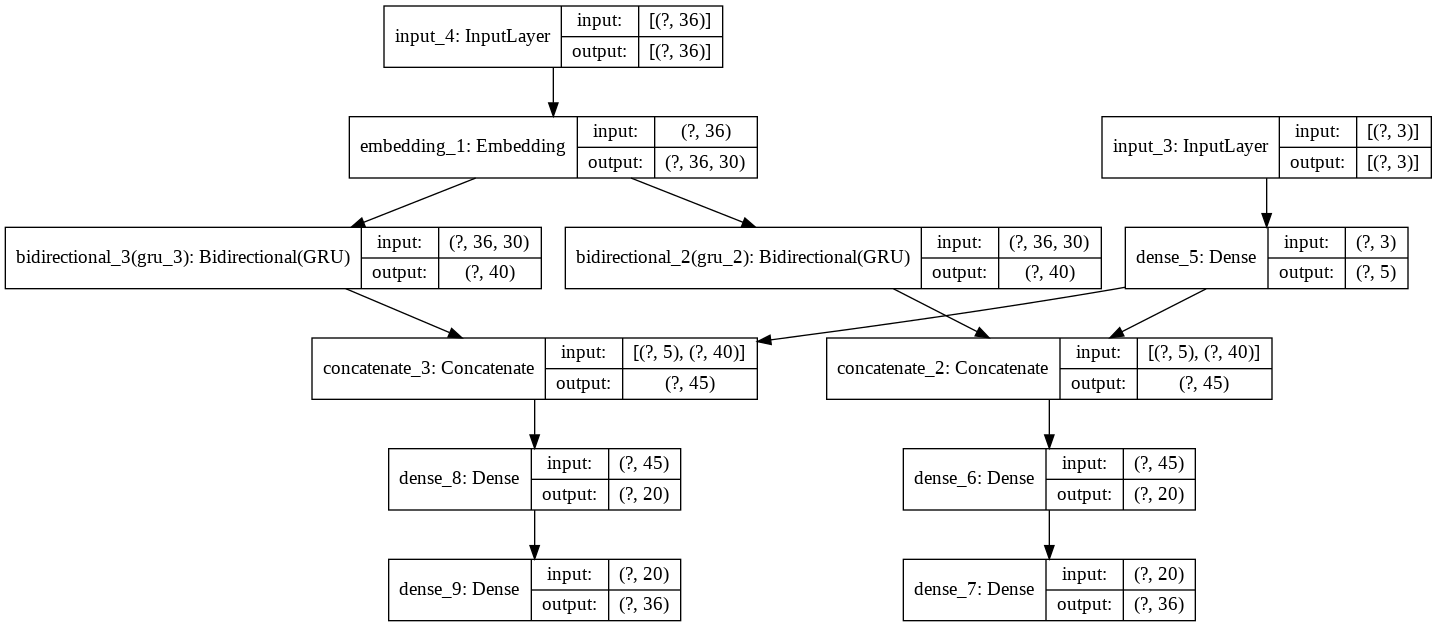

In [20]:
sentiment = layers.Input(shape=(3,))
toke_text = layers.Input(shape=(36,))

x = layers.Dense(5, activation="relu")(sentiment)

embedding_layer = layers.Embedding(len(tokenizer1.word_index) + 1,
                               30,
                               input_length=36,
                               mask_zero=True)(toke_text)

begin_model = layers.Bidirectional(
                    layers.GRU(20,
                               recurrent_dropout=0.5,
                               return_sequences=False)
                    )(embedding_layer)

begin_model = layers.concatenate([x, begin_model]) # add_sentiment 
begin_model = layers.Dense(20, activation='relu')(begin_model)
begin_model = layers.Dense(36, activation='softmax')(begin_model)


# end_model = layers.Embedding(len(tokenizer1.word_index) + 1,
#                               20,
#                               input_length=36,
#                               mask_zero=True)(toke_text)

end_model = layers.Bidirectional(
                    layers.GRU(20,
                               recurrent_dropout=0.5,
                               return_sequences=False)
                    )(embedding_layer)

end_model = layers.concatenate([x, end_model]) # add_sentiment 
end_model = layers.Dense(20, activation='relu')(end_model)
end_model = layers.Dense(36, activation='softmax')(end_model)


model = Model(inputs=[sentiment, toke_text], outputs=[begin_model, end_model])

optimizer = tf.keras.optimizers.Adam(lr=0.00001)

model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=["acc"])
tf.keras.utils.plot_model(model,
                          show_shapes=True,
                          show_layer_names=True)

In [21]:
X = tf.convert_to_tensor(indx_id)
sent = tf.convert_to_tensor(train_sentiment)

y_end =  tf.convert_to_tensor(begin_token)
y_begin = tf.convert_to_tensor(end_token)


In [22]:
history = model.fit([sent, X], [y_begin, y_end], batch_size=32, epochs=100,
                     validation_split=0.1, verbose=2)

Epoch 1/100
541/541 - 42s - loss: 6.6714 - dense_7_loss: 3.3509 - dense_9_loss: 3.3205 - dense_7_acc: 0.0441 - dense_9_acc: 0.0036 - val_loss: 6.6988 - val_dense_7_loss: 3.3741 - val_dense_9_loss: 3.3246 - val_dense_7_acc: 0.0421 - val_dense_9_acc: 0.0042
Epoch 2/100
541/541 - 41s - loss: 6.6121 - dense_7_loss: 3.3434 - dense_9_loss: 3.2688 - dense_7_acc: 0.0414 - dense_9_acc: 0.0933 - val_loss: 6.6308 - val_dense_7_loss: 3.3665 - val_dense_9_loss: 3.2643 - val_dense_7_acc: 0.0431 - val_dense_9_acc: 0.3695
Epoch 3/100
541/541 - 41s - loss: 6.5313 - dense_7_loss: 3.3358 - dense_9_loss: 3.1955 - dense_7_acc: 0.0441 - dense_9_acc: 0.4090 - val_loss: 6.5340 - val_dense_7_loss: 3.3587 - val_dense_9_loss: 3.1753 - val_dense_7_acc: 0.0494 - val_dense_9_acc: 0.5021
Epoch 4/100
541/541 - 41s - loss: 6.4082 - dense_7_loss: 3.3279 - dense_9_loss: 3.0804 - dense_7_acc: 0.0480 - dense_9_acc: 0.6000 - val_loss: 6.3846 - val_dense_7_loss: 3.3505 - val_dense_9_loss: 3.0341 - val_dense_7_acc: 0.0483 - 

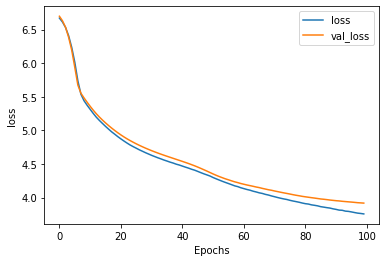

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

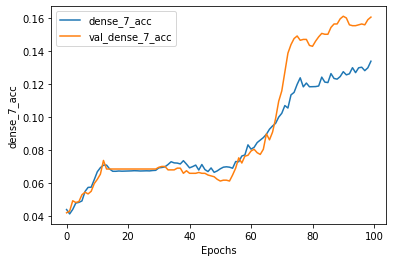

In [35]:
plot_graphs(history, "dense_7_acc")

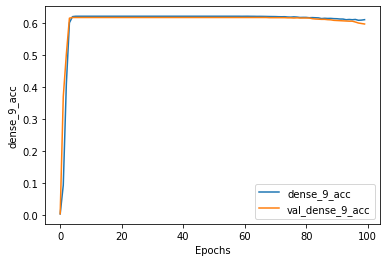

In [37]:
plot_graphs(history, "dense_9_acc")

In [31]:
history.history.keys()

dict_keys(['loss', 'dense_7_loss', 'dense_9_loss', 'dense_7_acc', 'dense_9_acc', 'val_loss', 'val_dense_7_loss', 'val_dense_9_loss', 'val_dense_7_acc', 'val_dense_9_acc'])

In [ ]:
sentiment = layers.Input(shape=(3,))
toke_text = layers.Input(shape=(36,))

x_beg = layers.Dense(3, activation="relu")(sentiment)

begin_model = layers.Embedding(len(tokenizer1.word_index) + 1,
                               20,
                               input_length=36,
                               mask_zero=True)(toke_text)

begin_model = layers.Bidirectional(
                    layers.GRU(16,
                               recurrent_dropout=0.5,
                               return_sequences=True)
                    )(begin_model)

begin_model = layers.Bidirectional(
                    layers.GRU(16,
                               recurrent_dropout=0.5,
                               return_sequences=False)
                    )(begin_model)                    

begin_model = layers.concatenate([x_beg, begin_model]) # add_sentiment 

begin_model = layers.Dense(64, activation='relu')(begin_model)
begin_model = layers.Dense(36, activation='softmax',
                           name="Begin_model")(begin_model)




end_model = layers.Embedding(len(tokenizer1.word_index) + 1,
                              20,
                              input_length=36,
                              mask_zero=True)(toke_text)

end_model = layers.Bidirectional(
                    layers.GRU(16,
                               recurrent_dropout=0.5,
                               return_sequences=True)
                    )(end_model)


end_model = layers.Bidirectional(
                    layers.GRU(16,
                               recurrent_dropout=0.5,
                               return_sequences=False)
                    )(end_model)                           
x_end = layers.Dense(3, activation="relu")(sentiment)
end_model = layers.concatenate([x_end, end_model]) # add_sentiment 

end_model = layers.Dense(64, activation='relu')(end_model)
end_model = layers.Dense(36, activation='softmax',
                        name = "End_model")(end_model)


model = Model(inputs=[sentiment, toke_text], outputs=[begin_model, end_model])
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=["acc"])
tf.keras.utils.plot_model(model,
                          show_shapes=True,
                          show_layer_names=True)

In [ ]:
X_t = tf.convert_to_tensor(indx_id_t)
y_t =  tf.convert_to_tensor(token_class_t.reshape(len(token_class_t), 36, 1))
results = model.evaluate(X_t, y_t, batch_size=128)

In [ ]:
predictions = model.predict(X_t).argmax(axis = 2)

In [ ]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [ ]:
k = np.random.randint(indx_id_t.shape[0]) 
print("texto real:")
print(X_test.iloc[k].lower().split())
print("texto real seleccionado:")
print(y_test.iloc[k].lower().split())
print("index_")
print(indx_id_t[k].astype(int))
print("predicciones:")
print(predictions[k])

a=np.argmax(predictions[k]!=0,)
b=np.argmax(predictions[k][::-1]!=0,)



if a == 0 and b == 0:
    print("nada")
elif a == b:
    index = indx_id_t[k]
    prediciton_text = tokenizer1.sequences_to_texts([index])
    print(tokenizer1.sequences_to_texts([index]))
else:
    index = indx_id_t[k][a:len(predictions[k])-b]
    prediciton_text = tokenizer1.sequences_to_texts([index])
    print(tokenizer1.sequences_to_texts([index]))

prediciton_text = prediciton_text[0].replace("<OOD>","")
print("=="*30)
print("Prediction:", prediciton_text.split())
print("Real:",  y_test.iloc[k].lower().split())
print("Jaccard Score:", jaccard(prediciton_text, y_test.iloc[k]))

In [ ]:
jac = []
for k in range(indx_id_t.shape[0]):
    a=np.argmax(predictions[k]!=0,)
    b=np.argmax(predictions[k][::-1]!=0,)


    if a == 0 and b == 0:
        prediciton_text = " "
    elif a == b:
        index = indx_id_t[k]
        prediciton_text = tokenizer1.sequences_to_texts([index])

    else:
        index = indx_id_t[k][a:len(predictions[k])-b]
        prediciton_text = tokenizer1.sequences_to_texts([index])
    
    jac.append(jaccard(prediciton_text[0],y_test.iloc[k]))

In [ ]:
np.array(jac).mean()